<h1 style='background:#CCE2CB; border:0; color:black'><center> Importing Libraries </center></h1> 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from xgboost import XGBClassifier

<h1 style='background:#CCE2CB; border:0; color:black'><center> Loading Data </center></h1> 

In [2]:
df = pd.read_csv('../input/heart-disease-health-indicators-dataset/heart_disease_health_indicators_BRFSS2015.csv')

<h1 style='background:#CCE2CB; border:0; color:black'><center> EDA </center></h1> 

In [3]:
df.sample(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
15209,1.0,1.0,1.0,1.0,24.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,4.0,2.0
145678,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,7.0
179549,0.0,1.0,0.0,1.0,26.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,0.0,13.0,4.0,3.0
161359,0.0,0.0,0.0,1.0,32.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
77011,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
Age, MentHlth, PhysHlth, BMI

In [9]:
catcol = ['', 'HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Education',
       'Income']

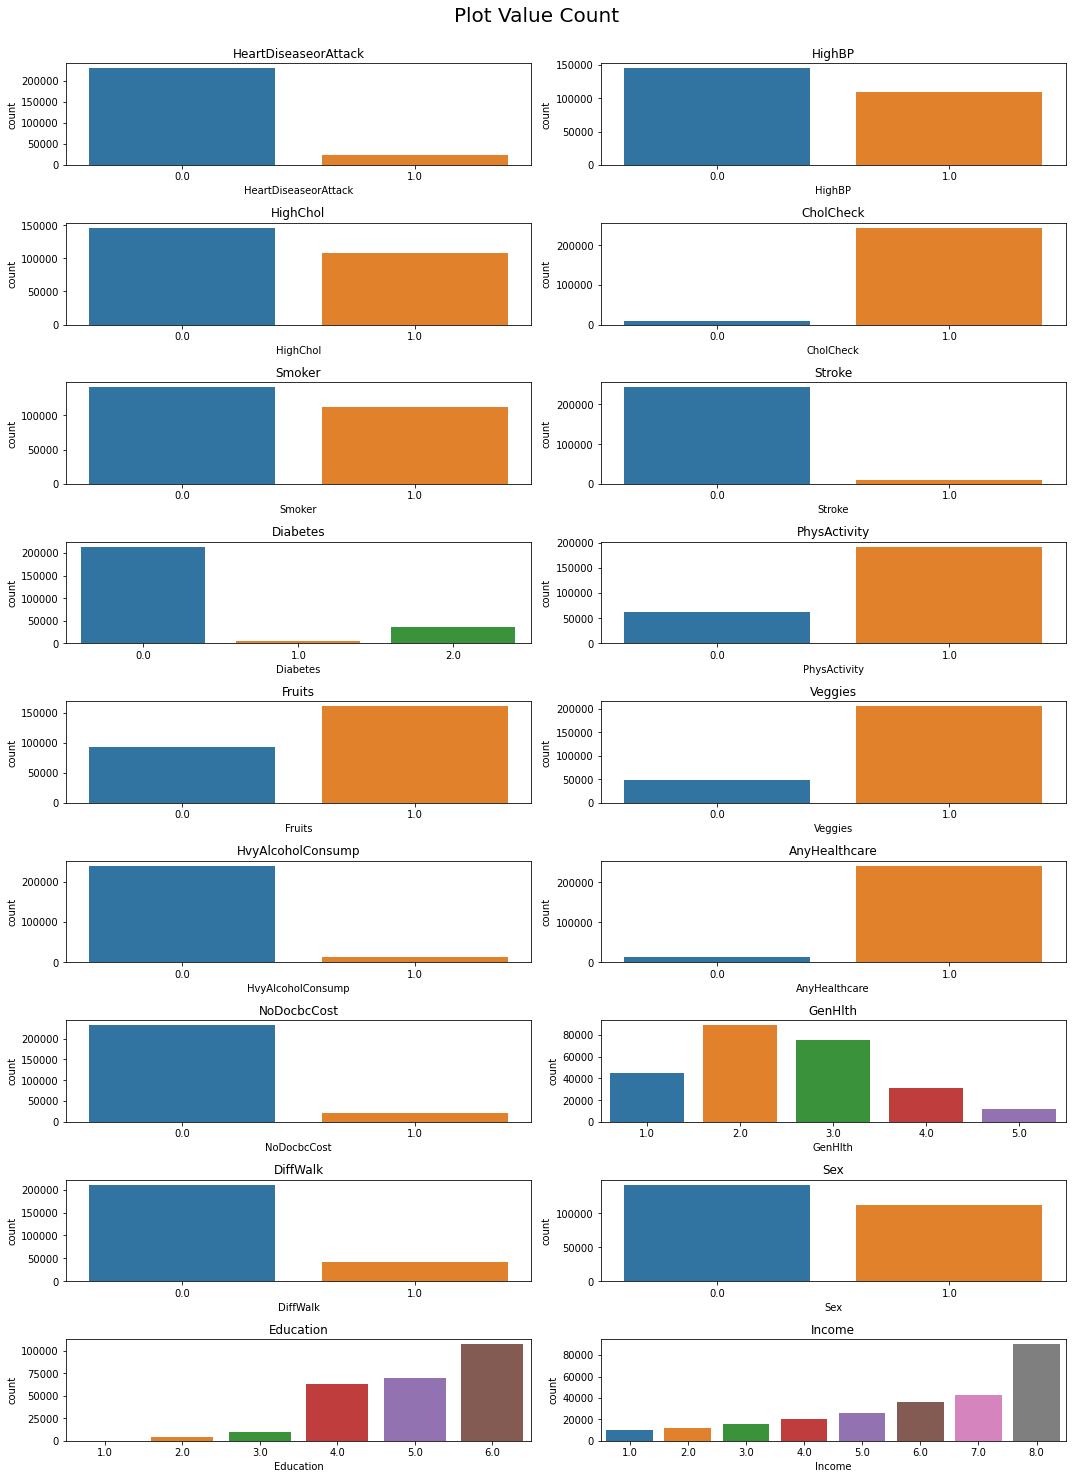

In [25]:
plt.figure(figsize=(15,40))
for i,column in enumerate(catcol):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

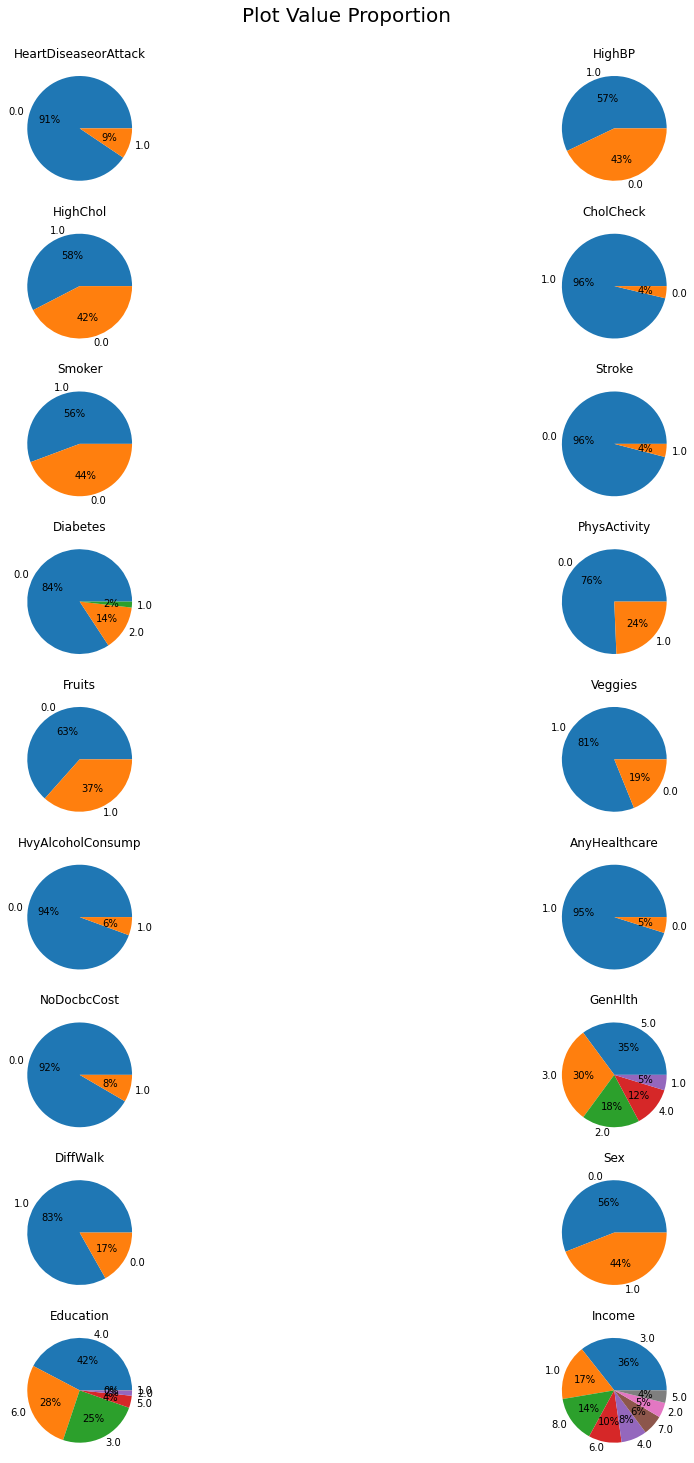

In [44]:
plt.figure(figsize=(15,40))
for i,column in enumerate(catcol):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Proportion", fontsize=20, x=0.5, y=1)
    plt.pie(x=df[column].value_counts(), labels=df[column].unique(), autopct='%.0f%%')
    plt.title(f"{column}")
    plt.tight_layout()

<AxesSubplot:xlabel='BMI', ylabel='Count'>

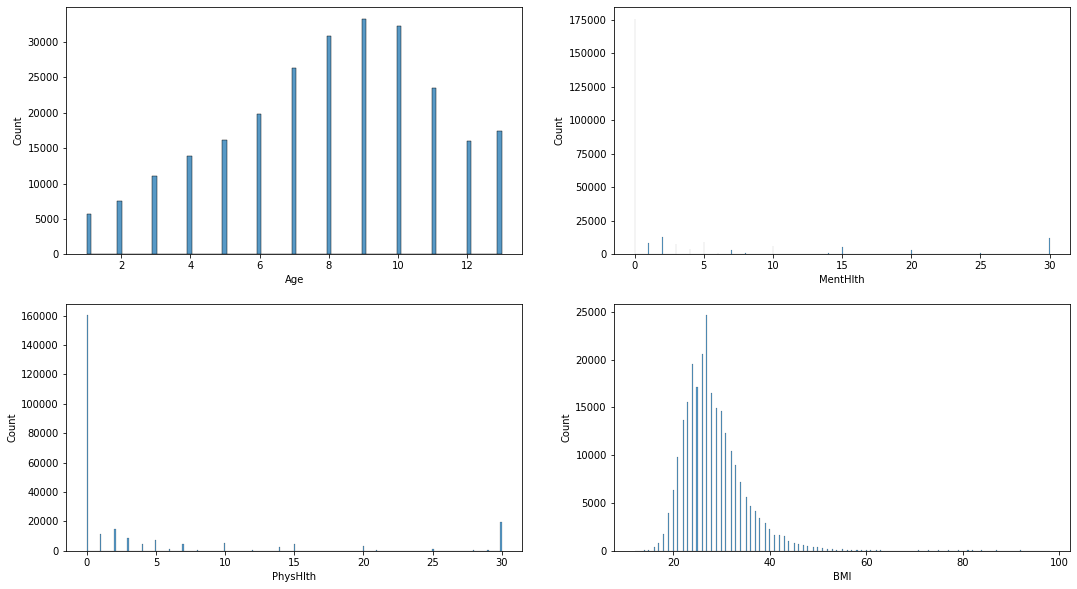

In [42]:
distcol = ['Age', 'MentHlth', 'PhysHlth', 'BMI']
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0,0], data=df, x=distcol[0])
sns.histplot(ax=axes[0,1], data=df, x=distcol[1])
sns.histplot(ax=axes[1,0], data=df, x=distcol[2])
sns.histplot(ax=axes[1,1], data=df, x=distcol[3])

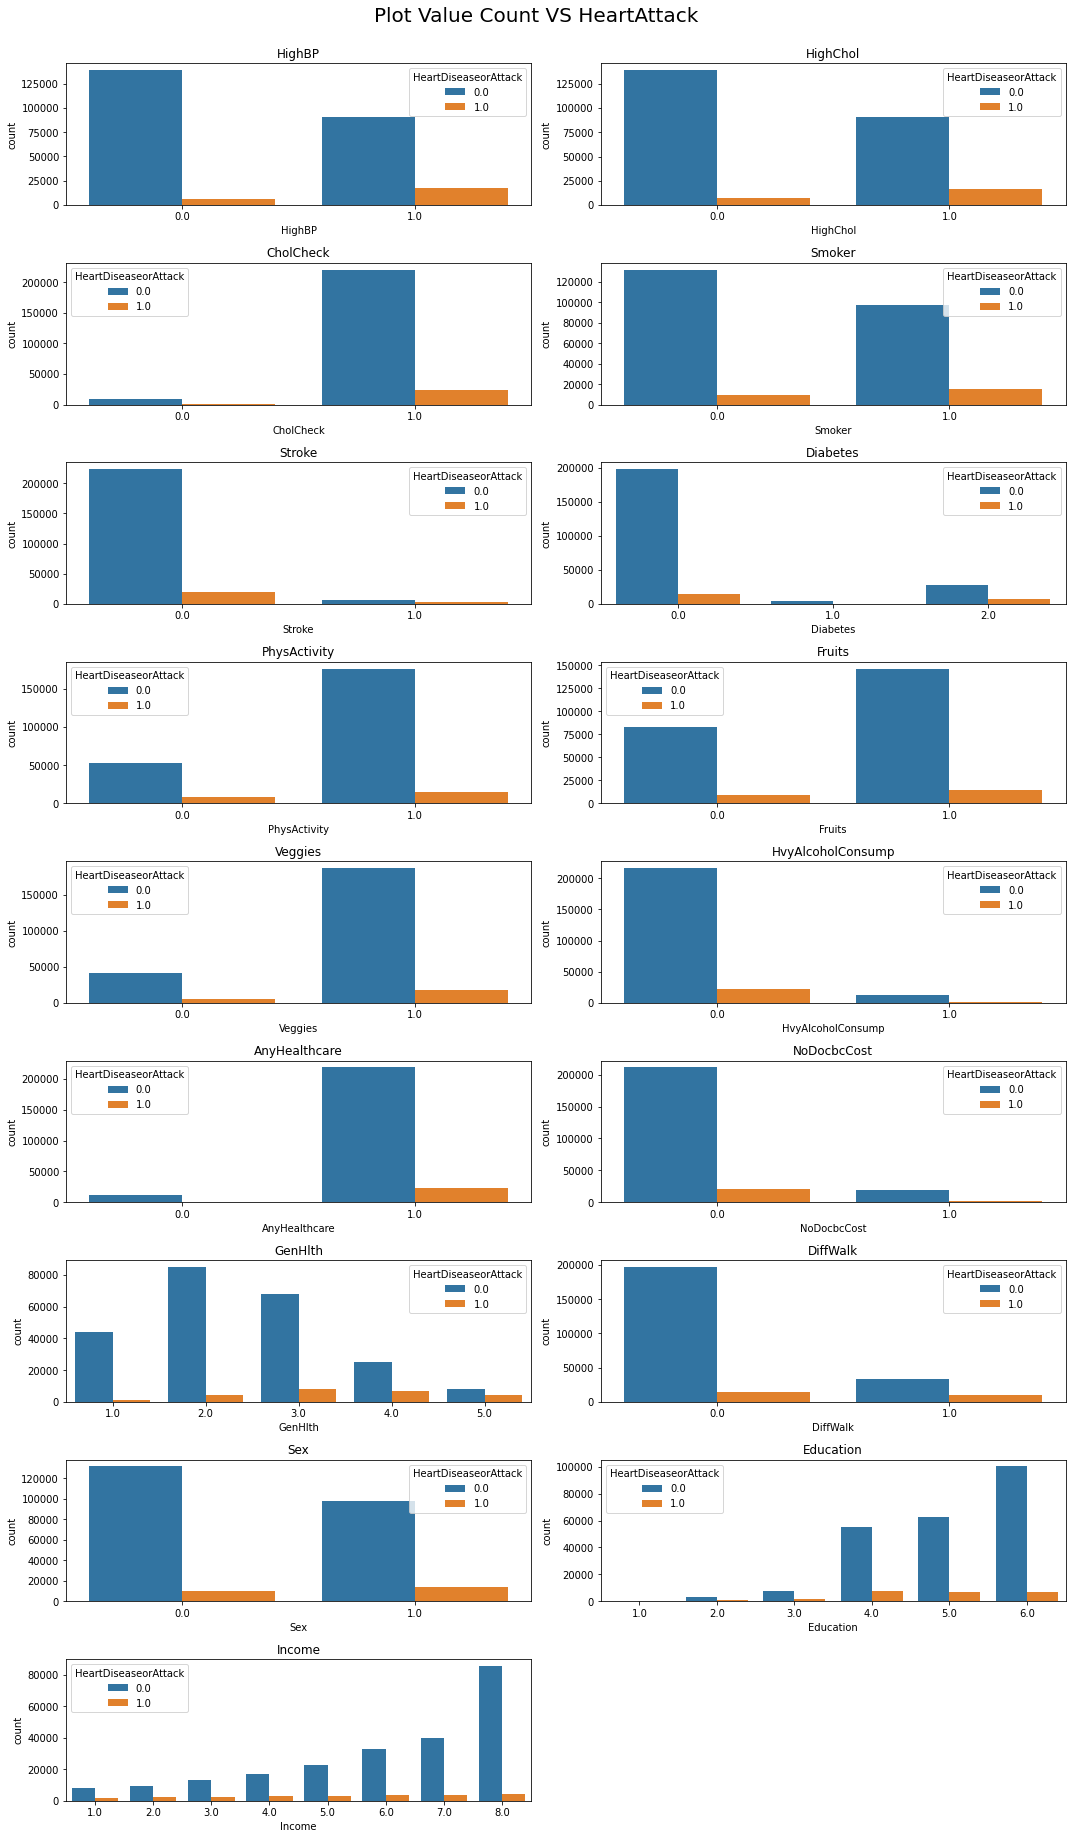

In [51]:
plt.figure(figsize=(15,50))
for i,column in enumerate(catcol[1:]):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, hue='HeartDiseaseorAttack')
    plt.title(f"{column}")
    plt.tight_layout()

In [56]:
bincol = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
         'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

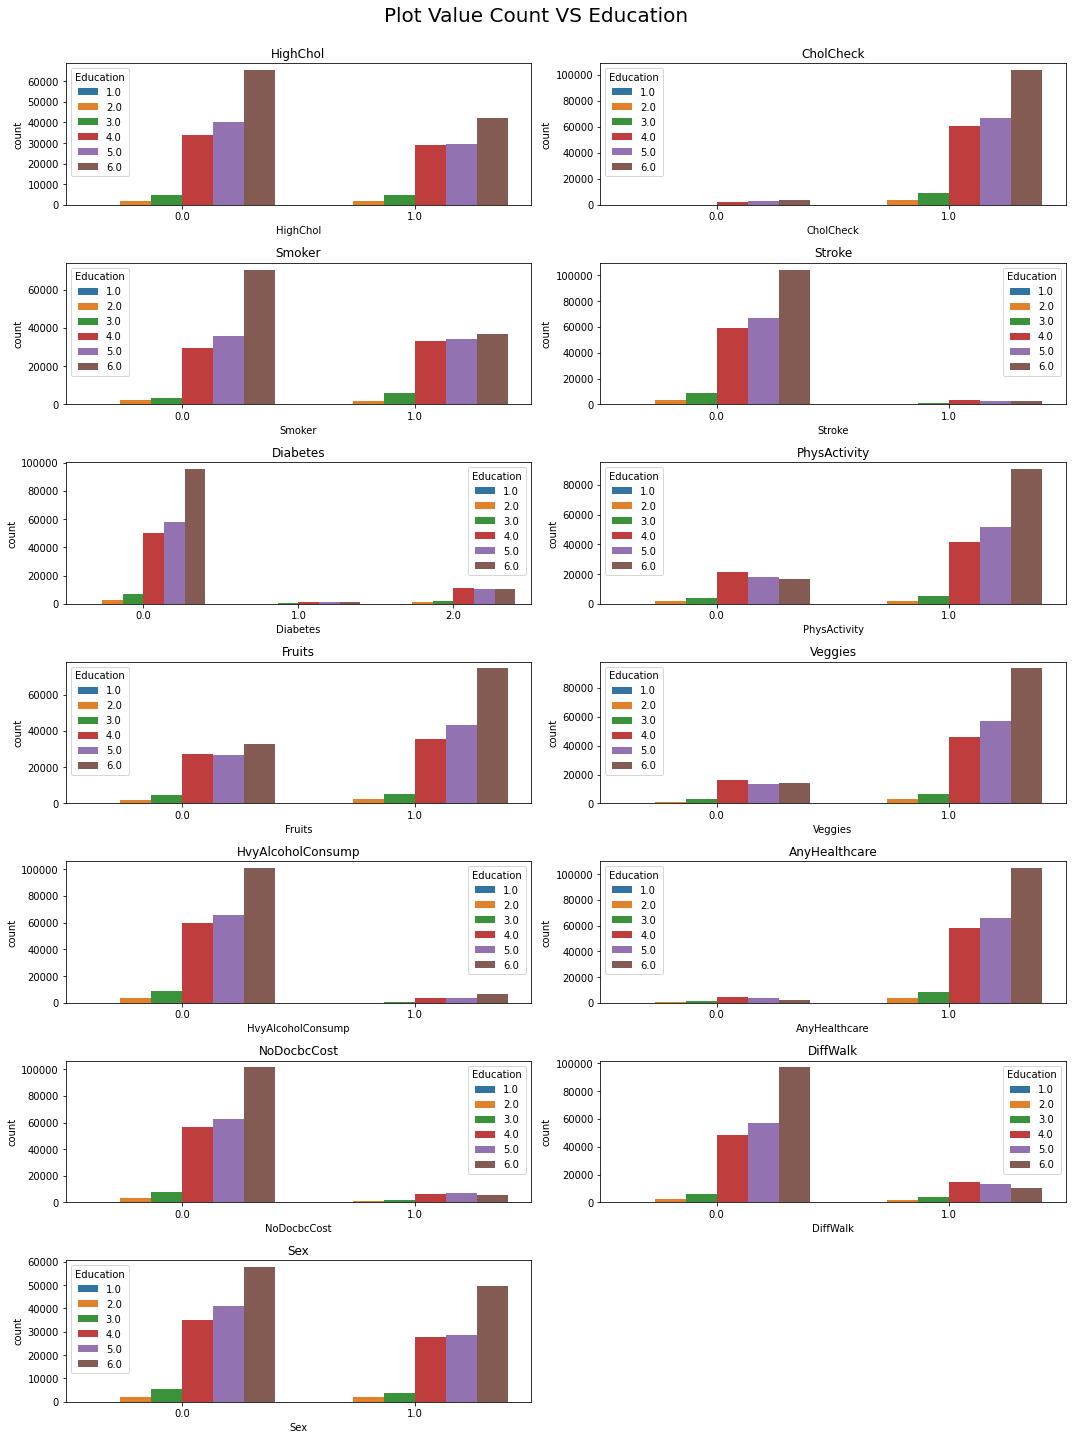

In [57]:
plt.figure(figsize=(15,50))
for i,column in enumerate(bincol[1:]):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count VS Education", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, hue='Education')
    plt.title(f"{column}")
    plt.tight_layout()

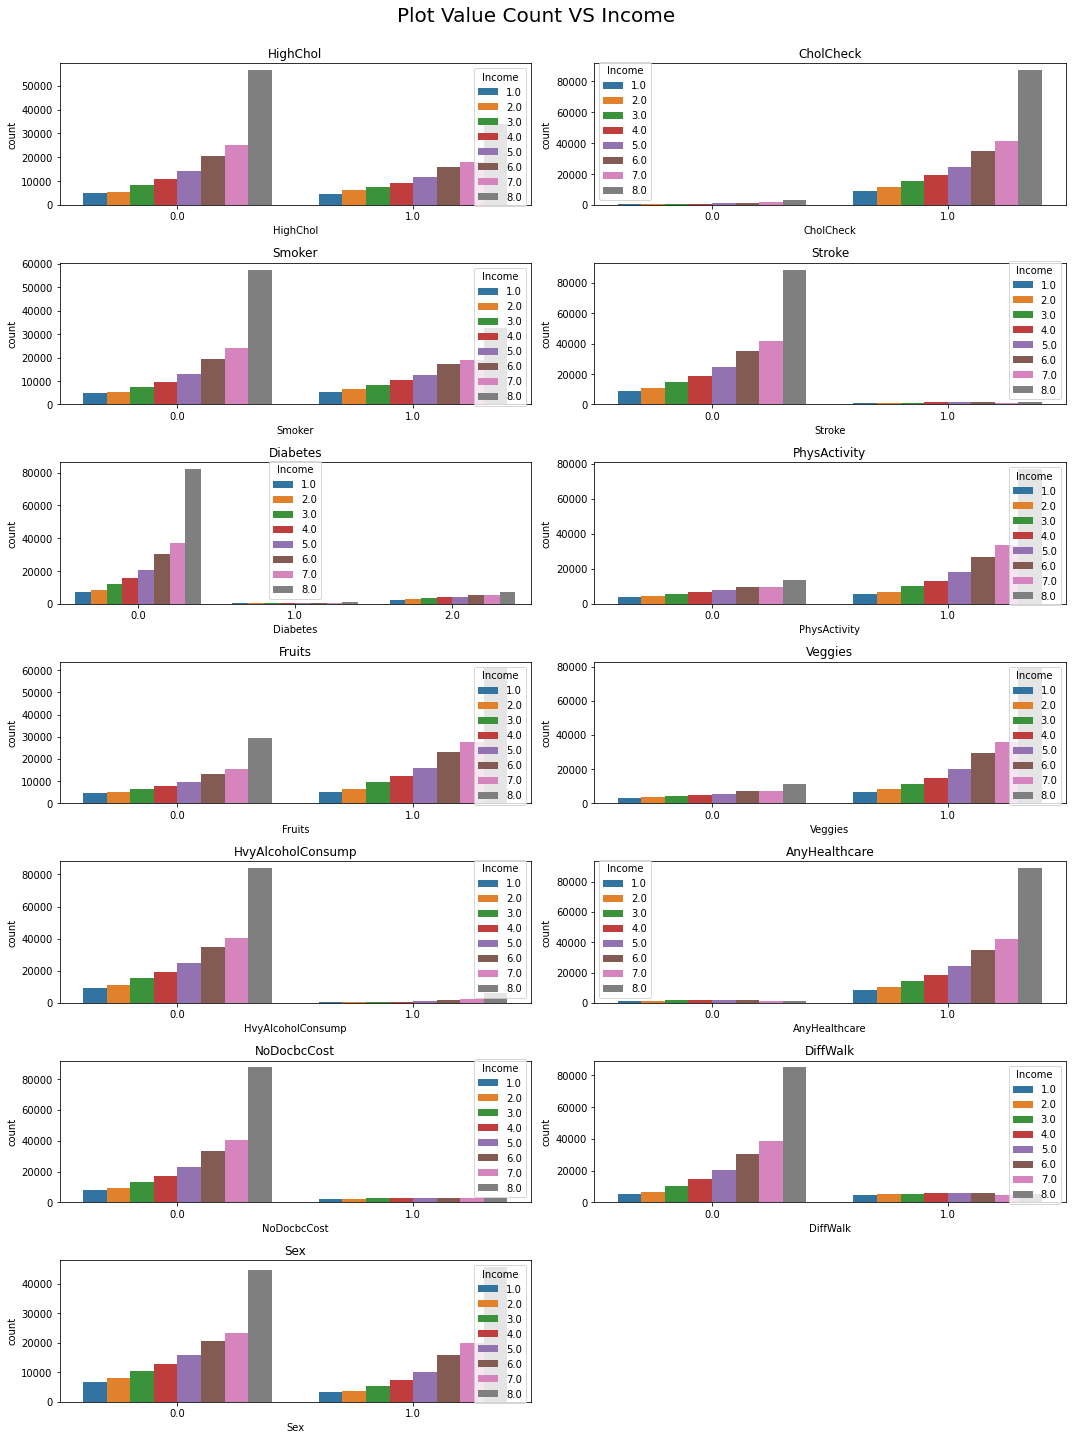

In [58]:
plt.figure(figsize=(15,50))
for i,column in enumerate(bincol[1:]):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count VS Income", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, hue='Income')
    plt.title(f"{column}")
    plt.tight_layout()

<h1 style='background:#CCE2CB; border:0; color:black'><center> Feature Engineering </center></h1> 

In [81]:
# MinMaxScaler
for feature in ['BMI', 'MentHlth', 'PhysHlth']: 
    df[feature] = df[feature].astype('int64')
    df[feature] = MinMaxScaler(feature_range=(0, 1)).fit_transform(df[[feature]])

<h1 style='background:#CCE2CB; border:0; color:black'><center> Preprocessing </center></h1> 

In [83]:
# Split column to Feature(X) and Target(Y)
X = df.drop(columns='HeartDiseaseorAttack')
Y = df['HeartDiseaseorAttack']

In [84]:
# Split data to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=48)

<h1 style='background:#CCE2CB; border:0; color:black'><center> Preprocessing </center></h1> 

In [97]:
# I will try some classifier algorithm and not tune the parameter, let it default
algorithm = [
#     LogisticRegression(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
]

In [98]:
# Data without resample
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns = log_cols)

for cla in algorithm:
    cla.fit(X_train, Y_train)
    name = cla.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')
    
    train_predictions = cla.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = cla.predict(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")
    
    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    log = log.append(log_entry)
    
print("=" * 30)

KNeighborsClassifier
****Results****
Accuracy: 89.7371%
Log Loss: 3.544707998995175


RandomForestClassifier
****Results****
Accuracy: 90.2003%
Log Loss: 3.38472368261877




/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:12:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
****Results****
Accuracy: 90.6969%
Log Loss: 3.213170174904713


AdaBoostClassifier
****Results****
Accuracy: 90.6950%
Log Loss: 3.2138528681970264


GradientBoostingClassifier
****Results****
Accuracy: 90.7935%
Log Loss: 3.1798120699148007


